In [37]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import sklearn

In [38]:
data=pd.read_csv('creditcard.csv')

In [39]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [40]:
data.shape

(284807, 31)

In [41]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [49]:
#to cut short the working data as its quite large
data=data.sample(frac=0.05, random_state=1)

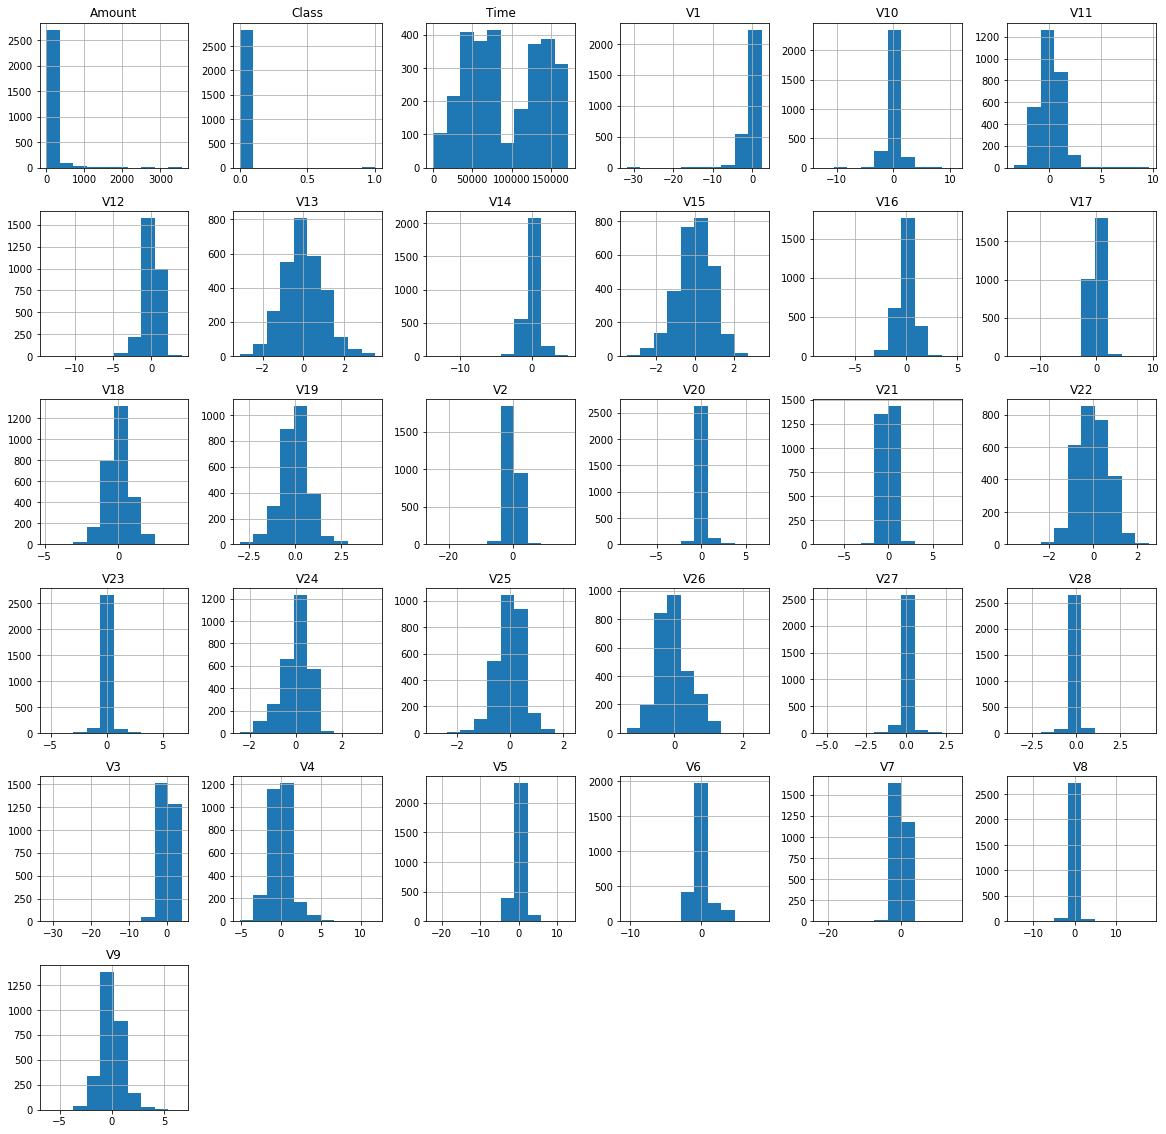

In [50]:
data.hist(figsize=(20,20))
plt.show()

In [51]:
fraud= data[data['Class']==1]
valid= data[data['Class']==0]
outlier_fraction=len(fraud)/float(len(valid))
print('Fraction of fraud over valid cases {}'.format(outlier_fraction))
print('Fraud cases {},'.format(len(fraud)))
print('Valid cases {},'.format(len(valid)))

Fraction of fraud over valid cases 0.0024639211545230554
Fraud cases 7,
Valid cases 2841,


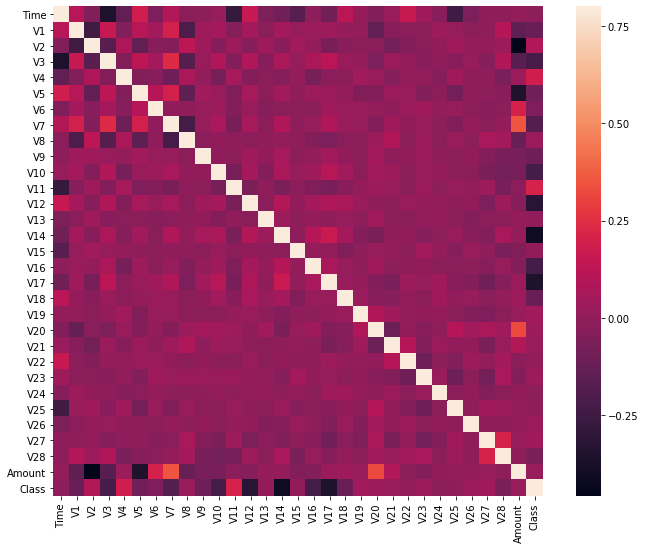

In [52]:
#build correaltion matrix to see if there is any strong correlation with any of the column in data set
corrmat=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [53]:
#filtering data by removing class since it is unsupervised learning and storing it in target
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target = "Class"
X=data[columns]
Y=data[target]
print(X.shape)
print(Y.shape)

(2848, 30)
(2848,)


In [54]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state=1
#define outlier detection methods
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X), contamination=outlier_fraction, random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors=20,
    contamination=outlier_fraction)
            
}


In [55]:
#fitting the model
n_outiers=len(fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
      if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
      else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
        #reshaping the prediction values to 0 for valid and 1 for fraud
      y_pred[y_pred==1]=0
      y_pred[y_pred==-1]=1
      n_errors=(y_pred!=Y).sum()
    #classifiaction metrics
      print('{}:{}'.format(clf_name, n_errors))
      print(accuracy_score(Y, y_pred))
      print(classification_report(Y, y_pred))
            

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest:9
0.9968398876404494
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2841
           1       0.38      0.43      0.40         7

    accuracy                           1.00      2848
   macro avg       0.69      0.71      0.70      2848
weighted avg       1.00      1.00      1.00      2848

Local Outlier Factor:15
0.9947331460674157
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2841
           1       0.00      0.00      0.00         7

    accuracy                           0.99      2848
   macro avg       0.50      0.50      0.50      2848
weighted avg       1.00      0.99      0.99      2848

